<a href="https://colab.research.google.com/github/jmhaussaire/SOAI-Project/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTS

In [1]:
!git clone https://github.com/jmhaussaire/SOAI-Project.git
import os
os.chdir('SOAI-Project')
!ls

Cloning into 'SOAI-Project'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 100 (delta 42), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (100/100), 3.91 MiB | 3.60 MiB/s, done.
Resolving deltas: 100% (42/42), done.
classification.ipynb	    model_data
classification.py	    README.md
common.py		    Swiss10_prep.ipynb
CVTracker.py		    TrafficCamera_DetectionAndTrackingIOU.ipynb
DetectionAndTrackingCV.py   TrafficCamera_DetectionAndTracking.ipynb
DetectionAndTrackingIOU.py  video.py
detectionprovider.py	    yolo3
IOUTracker.py		    yolo.py
LICENSE


In [2]:
%reload_ext autoreload
%autoreload 2
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import classification
os.chdir("/gdrive/My Drive/SOAI/")
import glob
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import scipy.stats
import numpy as np
import copy 
import itertools
from tqdm import tqdm_notebook




# Get bounding box corners from xml file

In [4]:
tracks = classification.get_bbox('outputs_17_02_2020/',max_file=1000)    

# Classification and LOI


parameters

In [0]:
n_cluster = 3
max_iter = 100


K-means Algorithm

In [6]:
# Compute a k-mean algorithm to cluster the tracks into lanes
clusters = classification.k_means(tracks,n_cluster,max_iter)

0
1
2
3


Determine LOI

In [0]:
LOI = classification.get_LOI(clusters)

In [8]:
print(LOI)

[[202.50002992  82.98437131]
 [138.85053205 437.88706671]]


# Plotting 

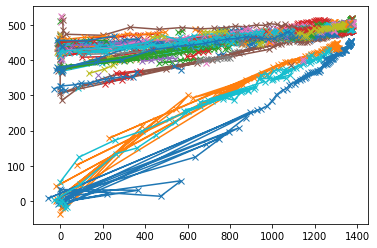

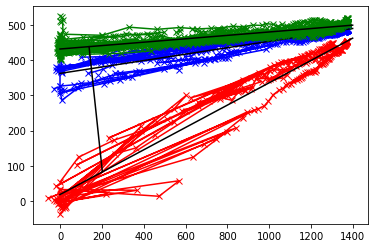

In [10]:
classification.plotting(tracks,clusters,LOI)